# Rainfall Weather Forecasting
## Project Description
- Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.
- Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:

# Problem Statement:
- a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.
- b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


In [ ]:
# Import The Libraries, Load The Dataset & Wrangle it:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('Rainfall.csv') # Importing csv file

In [ ]:
df = pd.DataFrame(data=data) # Making Dataframe

In [ ]:
df.head() # top five records of Dataset for varification of Data set

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
# Convert the 'Date' column to datetime with the correct format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Extract year, month, and day from the 'Date' column and create new columns
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

# Drop the original 'Date' column
df.drop(['Date'], axis=1, inplace=True)

# Check the dataset again
df.head()


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [ ]:
df.shape

(8425, 25)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8425 non-null   object 
 1   MinTemp        8350 non-null   float64
 2   MaxTemp        8365 non-null   float64
 3   Rainfall       8185 non-null   float64
 4   Evaporation    4913 non-null   float64
 5   Sunshine       4431 non-null   float64
 6   WindGustDir    7434 non-null   object 
 7   WindGustSpeed  7434 non-null   float64
 8   WindDir9am     7596 non-null   object 
 9   WindDir3pm     8117 non-null   object 
 10  WindSpeed9am   8349 non-null   float64
 11  WindSpeed3pm   8318 non-null   float64
 12  Humidity9am    8366 non-null   float64
 13  Humidity3pm    8323 non-null   float64
 14  Pressure9am    7116 non-null   float64
 15  Pressure3pm    7113 non-null   float64
 16  Cloud9am       6004 non-null   float64
 17  Cloud3pm       5970 non-null   float64
 18  Temp9am 

**Here we can convert Raintoday and RainTommorrow in numbers**

In [ ]:
df['RainToday'].replace({'No':0, 'Yes':1},inplace= True) # convet 0 and 1 from No and Yes
df['RainTomorrow'].replace({'No':0, 'Yes':1},inplace= True) # convert 0 and 1 from No and Yes
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,0.0,0.0,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,0.0,0.0,2008,12,5


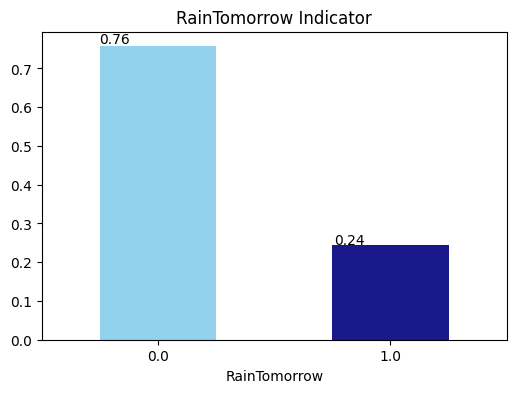

In [ ]:
# lets check the count of 0 and 1 in RainTomorrow
fig = plt.figure(figsize=(6,4))
 # Plot the bar chart
ax = df.RainTomorrow.value_counts(normalize= True).plot(kind='bar',color=['skyblue','navy'], alpha=0.9, rot=0)
 # Add title to the plot
plt.title('RainTomorrow Indicator')
for p in ax.patches: # Annotate each bar with its proportion
  ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01, p.get_height()*1.01))
plt.show()  # Show the plot

**This is imbalenced set**

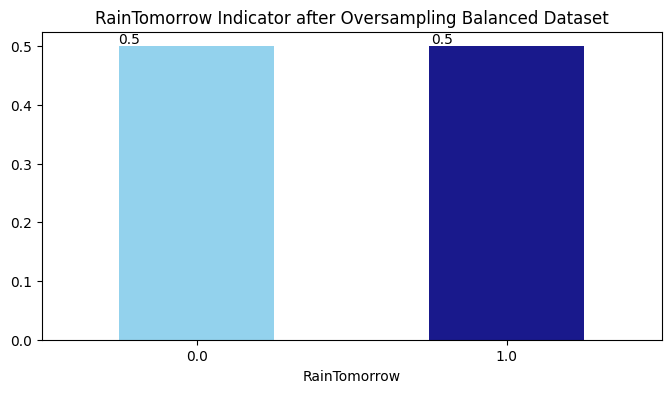

In [ ]:
# Import necessary libraries
from sklearn.utils import resample

# Split the dataset into two subsets based on the value of 'RainTomorrow'
no = df[df.RainTomorrow == 0]
yes = df[df.RainTomorrow == 1]

# Perform oversampling on the 'yes' subset to match the number of samples in the 'no' subset
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=42)

# Concatenate the original 'no' subset with the oversampled 'yes' subset to create a balanced dataset
oversampled = pd.concat([no, yes_oversampled])

# Create a bar plot to visualize the distribution of the 'RainTomorrow' variable in the oversampled dataset
fig = plt.figure(figsize=(8, 4))
ax = oversampled.RainTomorrow.value_counts(normalize=True).plot(kind='bar', color=['skyblue', 'navy'], alpha=0.9, rot=0)
plt.title('RainTomorrow Indicator after Oversampling Balanced Dataset')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.01, p.get_height() * 1.01))
plt.show()


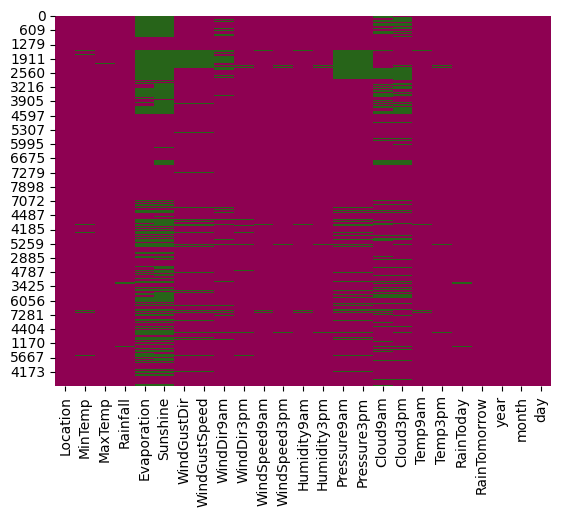

In [ ]:
# cheking Missing value
import seaborn as sns
sns.heatmap(oversampled.isnull(),cbar=False, cmap='PiYG')
plt.show()

In [ ]:
# Checking columns and total value of missing %
total = oversampled.isnull().sum().sort_values(ascending=False)
percent = (oversampled.isnull().sum()/oversampled.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()

,Total,Percent
Sunshine,5929,0.478531
Evaporation,5202,0.419855
Cloud9am,3216,0.259564
Cloud3pm,3205,0.258676
Pressure3pm,1945,0.156981


In [ ]:
oversampled.select_dtypes(include=['object']).columns

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [ ]:
# Impute categorical var with Mode
oversampled['Location'] = oversampled['Location'].fillna(oversampled['Location'].mode()[0])
oversampled['WindGustDir'] = oversampled['WindGustDir'].fillna(oversampled['WindGustDir'].mode()[0])
oversampled['WindDir9am'] = oversampled['WindDir9am'].fillna(oversampled['WindDir9am'].mode()[0])
oversampled['WindDir3pm'] = oversampled['WindDir3pm'].fillna(oversampled['WindDir3pm'].mode()[0])

In [ ]:
# Convert categorical features to continuous features with Label Encoding
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in oversampled.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    oversampled[col] = lencoders[col].fit_transform(oversampled[col])

In [ ]:
# Multiple Imputation by Chained Equations
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MiceImputed = oversampled.copy(deep=True)
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(oversampled)

In [ ]:
# Detecting outliers with IQR
Q1 = MiceImputed.quantile(0.25)
Q3 = MiceImputed.quantile(0.75)
IQR = Q3 - Q1
print(IQR.sort_values(ascending=False))

Humidity3pm      27.998659
Humidity9am      24.000000
WindGustSpeed    20.000000
WindSpeed3pm     15.000000
day              15.000000
WindSpeed9am     13.000000
WindGustDir       9.000000
WindDir9am        9.000000
MaxTemp           8.500000
Temp3pm           8.200000
MinTemp           8.200000
Pressure3pm       8.000000
Temp9am           8.000000
Pressure9am       8.000000
WindDir3pm        7.000000
Sunshine          6.381775
month             5.000000
Location          5.000000
Evaporation       4.200000
Cloud9am          4.007508
Cloud3pm          4.000000
year              4.000000
Rainfall          3.200000
RainToday         1.000000
RainTomorrow      1.000000
dtype: float64


In [ ]:
# Removing outliers from the dataset
MiceImputed = MiceImputed[~((MiceImputed < (Q1 - 1.5 * IQR)) |(MiceImputed > (Q3 + 1.5 * IQR))).any(axis=1)]
MiceImputed.shape

(9733, 25)

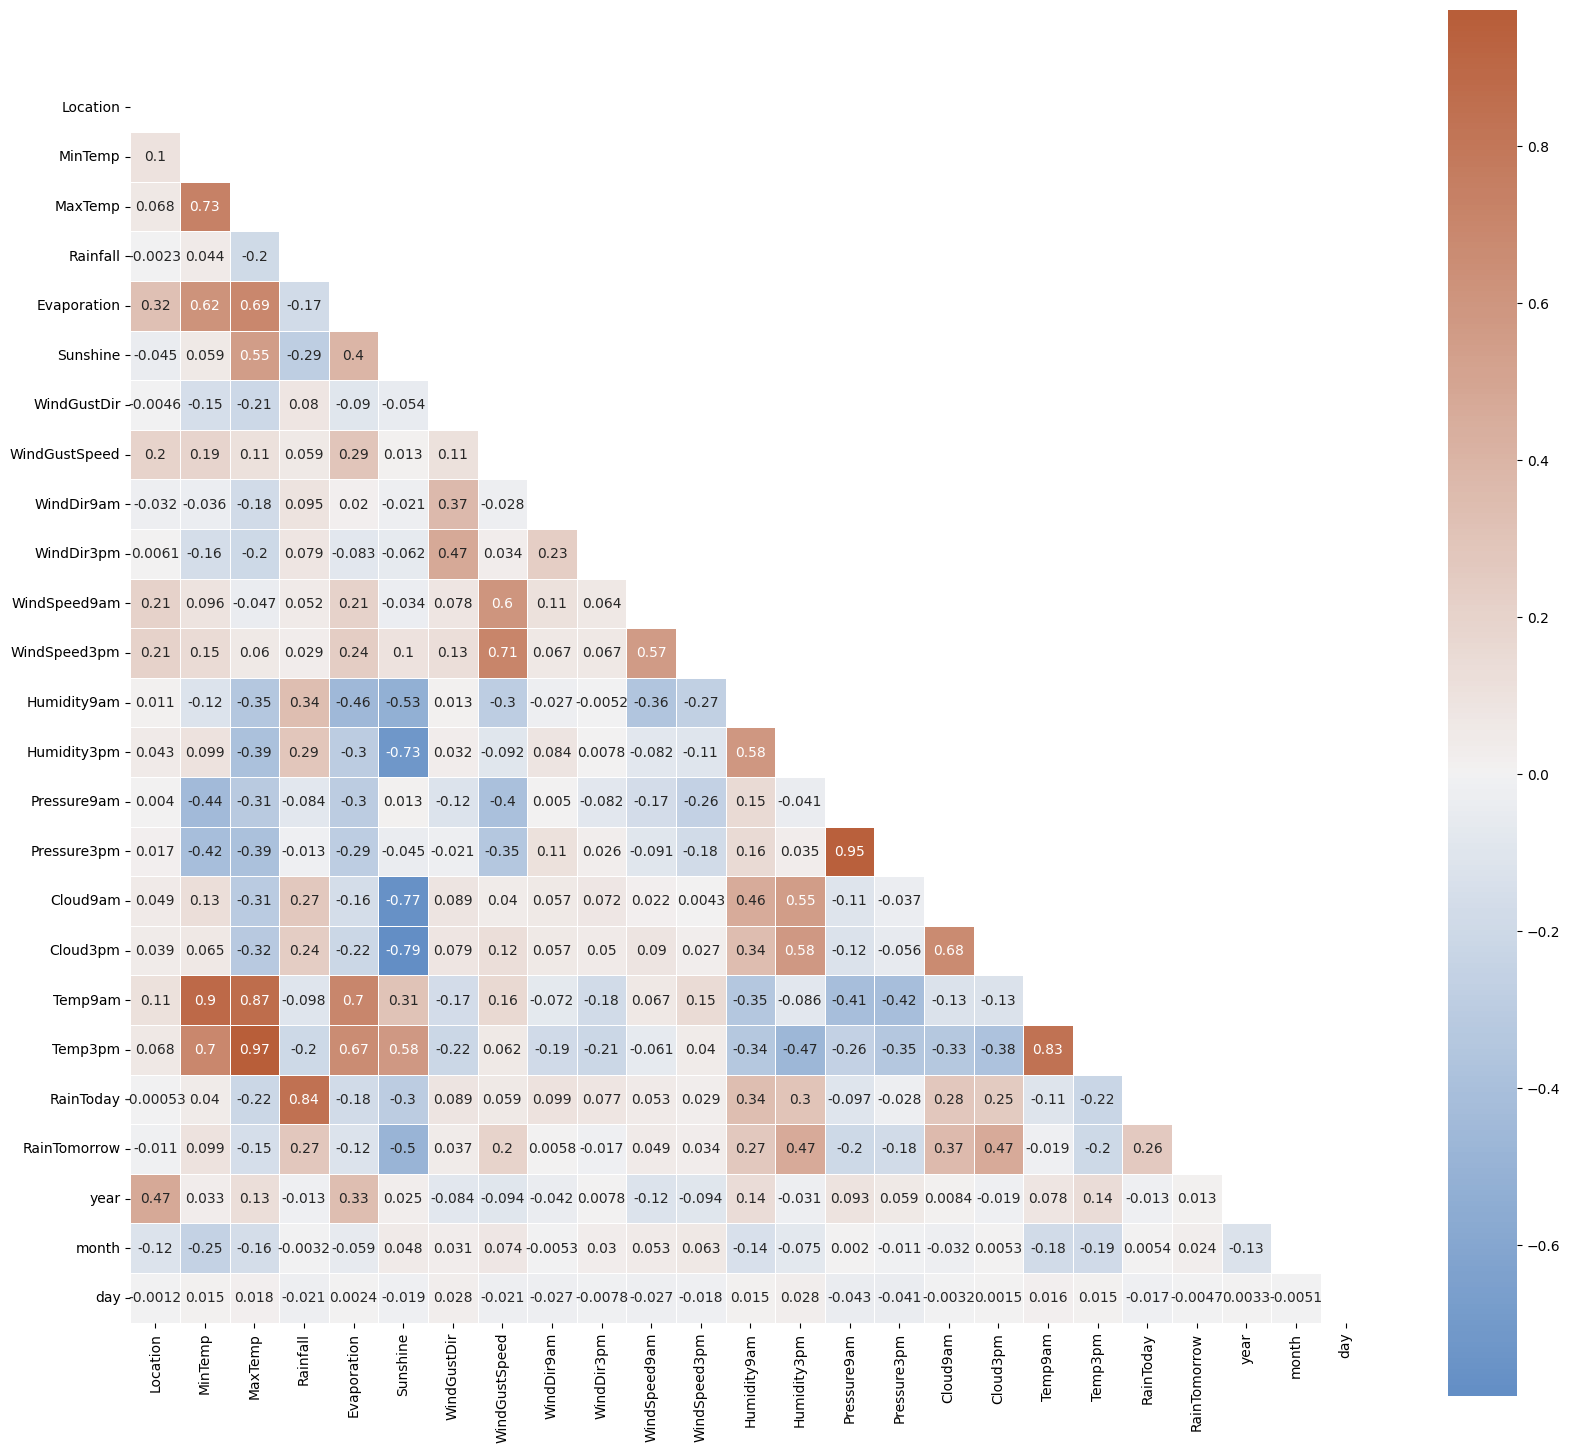

In [ ]:
# Calculate the correlation matrix
corr = MiceImputed.corr()

# Create a mask for the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create a matplotlib figure and axis for the heatmap
f, ax = plt.subplots(figsize=(20, 20))

# Define a colormap for the heatmap
cmap = sns.diverging_palette(250, 25, as_cmap=True)

# Create the heatmap using seaborn's heatmap function
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0, square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

# Show the heatmap
plt.show()

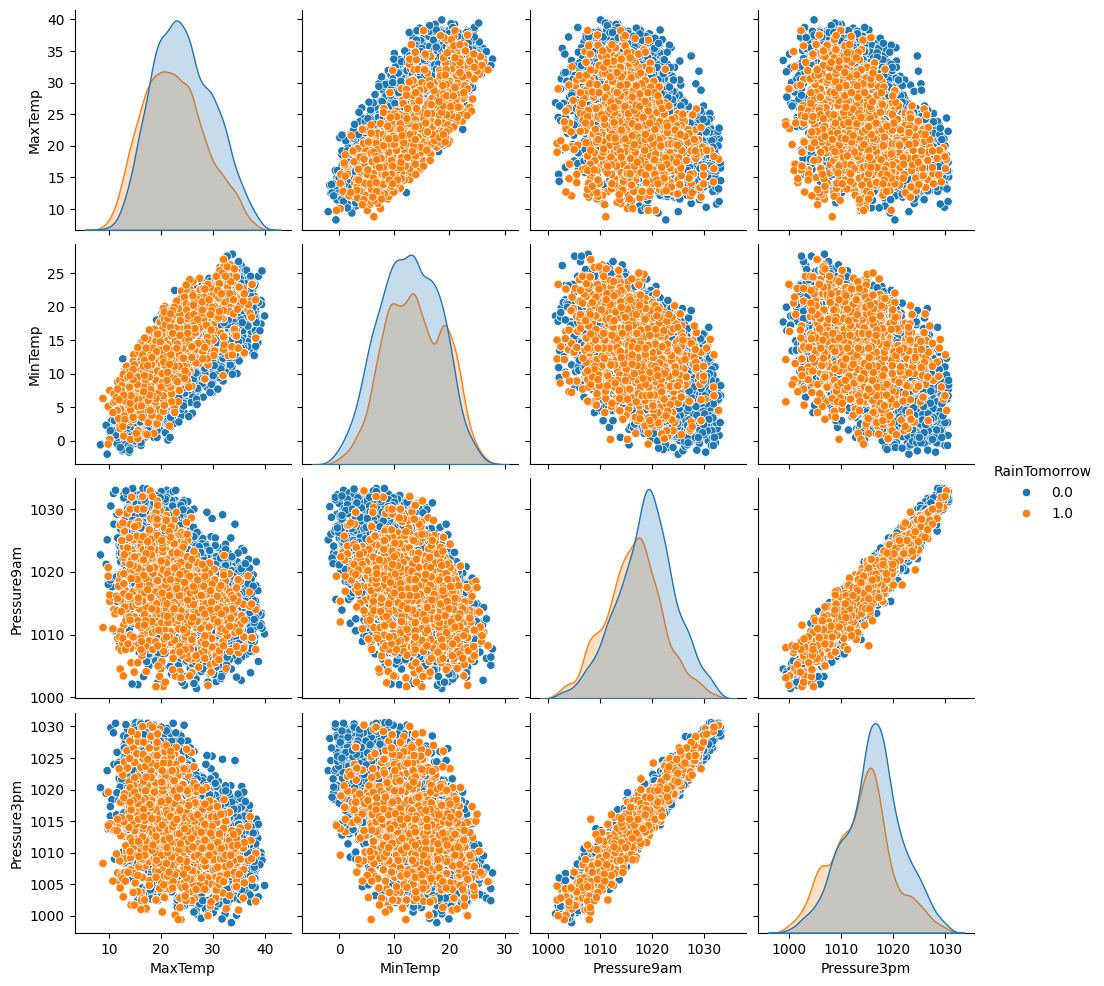

In [ ]:
# Create a pairplot to visualize pairwise relationships between variables
sns.pairplot(data=MiceImputed, vars=('MaxTemp', 'MinTemp', 'Pressure9am', 'Pressure3pm'), hue='RainTomorrow')

# Show the plot
plt.show()

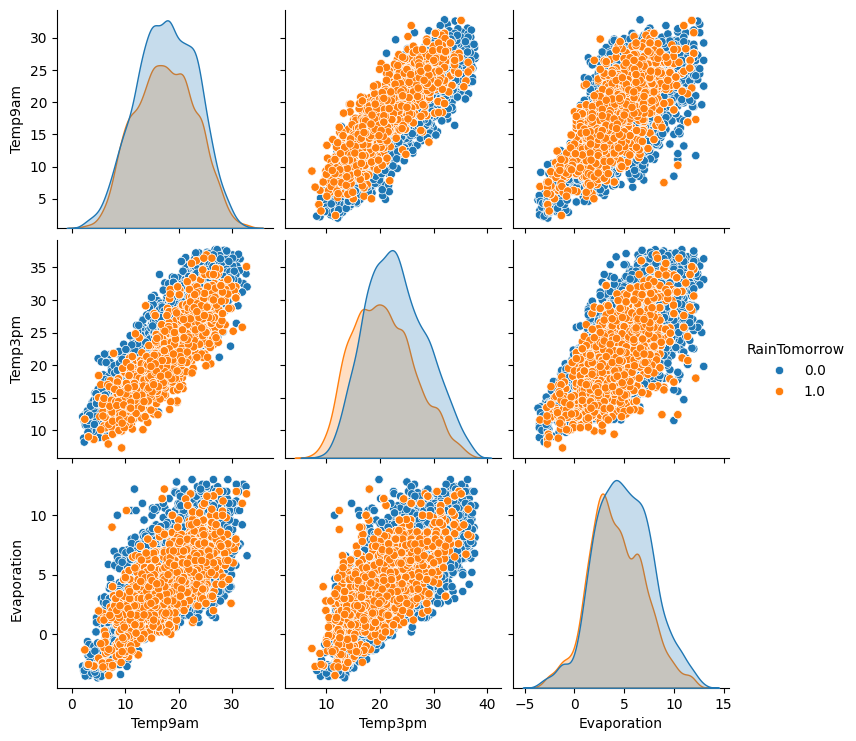

In [ ]:
# Create a pairplot to visualize pairwise relationships between variables
sns.pairplot( data=MiceImputed, vars=('Temp9am', 'Temp3pm', 'Evaporation'), hue='RainTomorrow' )

# Show the plot
plt.show()

In [ ]:
# Import necessary libraries
from sklearn import preprocessing

# Create a Min-Max scaler object
r_scaler = preprocessing.MinMaxScaler()

# Fit the scaler to the data
r_scaler.fit(MiceImputed)

# Transform the data using the fitted scaler and create a DataFrame
modified_data = pd.DataFrame(r_scaler.transform(MiceImputed), index=MiceImputed.index, columns=MiceImputed.columns)


In [ ]:
# Import necessary libraries
from sklearn.feature_selection import SelectKBest, chi2

# Select features and target variable
X = modified_data.loc[:, modified_data.columns != 'RainTomorrow']  # Features
y = modified_data[['RainTomorrow']]  # Target variable

# Initialize SelectKBest with chi-square as the scoring function and k=10 for selecting top 10 features
selector = SelectKBest(chi2, k=10)

# Fit the selector to the data
selector.fit(X, y)

# Transform the features to the selected top 10 features
X_new = selector.transform(X)

# Print the names of the selected features
print(X.columns[selector.get_support(indices=True)])


Index(['Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Cloud9am', 'Cloud3pm', 'Temp3pm', 'RainToday'],
      dtype='object')


In [ ]:
# Import necessary libraries
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

# Select features (X) and target variable (y)
X = MiceImputed.drop('RainTomorrow', axis=1)  # Features
y = MiceImputed['RainTomorrow']  # Target variable

# Initialize SelectFromModel with a random forest classifier and specify the number of estimators
selector = SelectFromModel(rf(n_estimators=100, random_state=0))

# Fit the selector to the data
selector.fit(X, y)

# Get the boolean mask of selected features
support = selector.get_support()

# Get the names of selected features
features = X.loc[:, support].columns.tolist()

# Print the names of selected features
print(features)

# Train a random forest classifier on the data and print feature importances
print(rf(n_estimators=100, random_state=0).fit(X, y).feature_importances_)


['Sunshine', 'WindGustSpeed', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm']
[0.02418963 0.03313076 0.03276269 0.03738755 0.03500645 0.100323
 0.02220111 0.05132293 0.02493261 0.02592364 0.02520161 0.02931005
 0.04064212 0.11352973 0.05166752 0.05022183 0.04645333 0.09714772
 0.03302874 0.03677058 0.01843198 0.02058738 0.02175667 0.02807039]


In [ ]:
# Select features and target variable
features = MiceImputed[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir',
                       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
                       'RainToday']]
target = MiceImputed['RainTomorrow']


In [ ]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42,
                                                    shuffle=True, stratify=target)


In [ ]:
# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [ ]:
def plot_roc_cur(fper, tper):
    # Plot the ROC curve
    plt.plot(fper, tper, color='orange', label='ROC')

    # Plot the diagonal line representing random guessing
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')

    # Set labels and title
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()


In [ ]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, roc_curve, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0 = time.time()
    if verbose == False:
        model.fit(X_train, y_train, verbose=0)
    else:
        model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))

    probs = model.predict_proba(X_test)
    probs = probs[:, 1]
    fper, tper, thresholds = roc_curve(y_test, probs)
    plot_roc_cur(fper, tper)

    plot_confusion_matrix(y_test, y_pred)

    return model, accuracy, roc_auc, coh_kap, time_taken


# Logistic Regression

Accuracy = 0.768361581920904
ROC Area under Curve = 0.761797280561598
Cohen's Kappa = 0.5272101426450801
Time taken = 0.2901937961578369
              precision    recall  f1-score   support

         0.0    0.77778   0.81860   0.79767      1086
         1.0    0.75498   0.70499   0.72913       861

    accuracy                        0.76836      1947
   macro avg    0.76638   0.76180   0.76340      1947
weighted avg    0.76769   0.76836   0.76736      1947



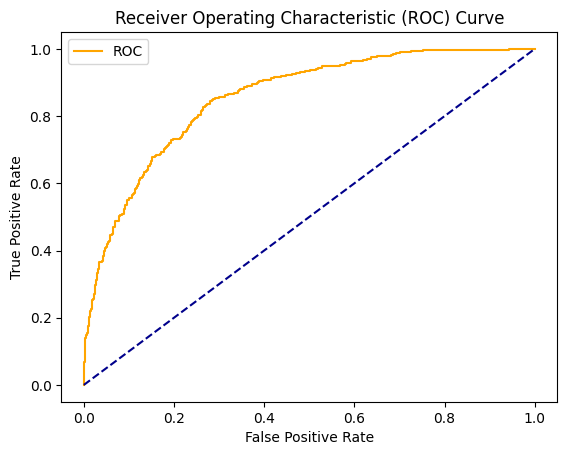

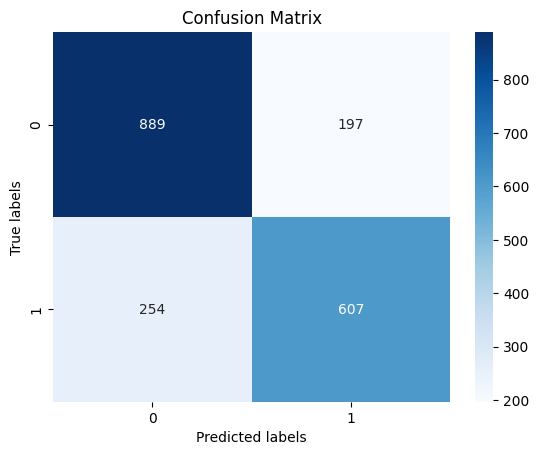

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

# Decision Tree

Accuracy = 0.8813559322033898
ROC Area under Curve = 0.8805320807746356
Cohen's Kappa = 0.7598756444816037
Time taken = 0.05759906768798828
              precision    recall  f1-score   support

         0.0    0.89842   0.88766   0.89301      1086
         1.0    0.86041   0.87340   0.86686       861

    accuracy                        0.88136      1947
   macro avg    0.87941   0.88053   0.87993      1947
weighted avg    0.88161   0.88136   0.88144      1947



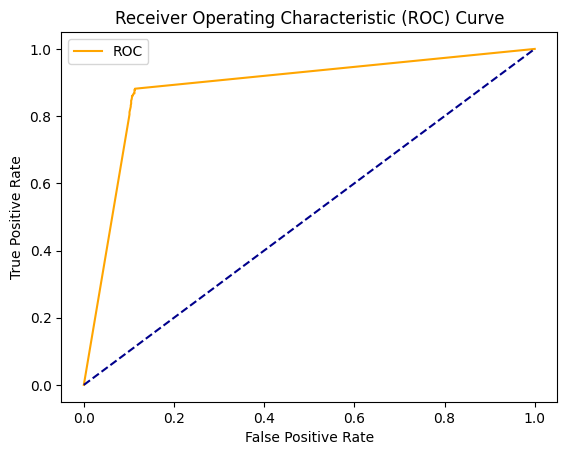

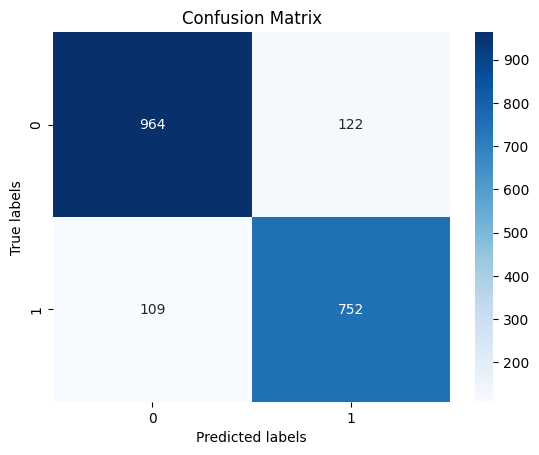

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, coh_kap_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

# Neural Network

Accuracy = 0.9517205957883924
ROC Area under Curve = 0.9553984509852991
Cohen's Kappa = 0.9029747250160632
Time taken = 35.08059072494507
              precision    recall  f1-score   support

         0.0    0.98915   0.92357   0.95524      1086
         1.0    0.91104   0.98722   0.94760       861

    accuracy                        0.95172      1947
   macro avg    0.95010   0.95540   0.95142      1947
weighted avg    0.95461   0.95172   0.95186      1947



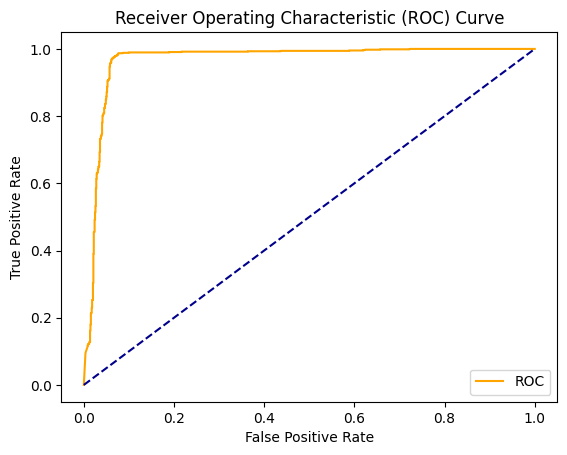

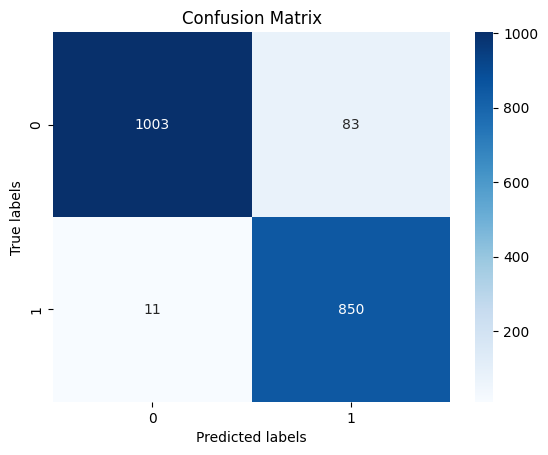

In [ ]:
# Neural Network
from sklearn.neural_network import MLPClassifier

params_nn = {'hidden_layer_sizes': (30,30,30),
             'activation': 'logistic',
             'solver': 'lbfgs',
             'max_iter': 500}

model_nn = MLPClassifier(**params_nn)
model_nn, accuracy_nn, roc_auc_nn, coh_kap_nn, tt_nn = run_model(model_nn, X_train, y_train, X_test, y_test)

 ## Random Forest Classifier

Accuracy = 0.9650744735490498
ROC Area under Curve = 0.9668877253097709
Cohen's Kappa = 0.9295256893011016
Time taken = 3.724736213684082
              precision    recall  f1-score   support

         0.0    0.98569   0.95120   0.96813      1086
         1.0    0.94105   0.98258   0.96136       861

    accuracy                        0.96507      1947
   macro avg    0.96337   0.96689   0.96475      1947
weighted avg    0.96595   0.96507   0.96514      1947



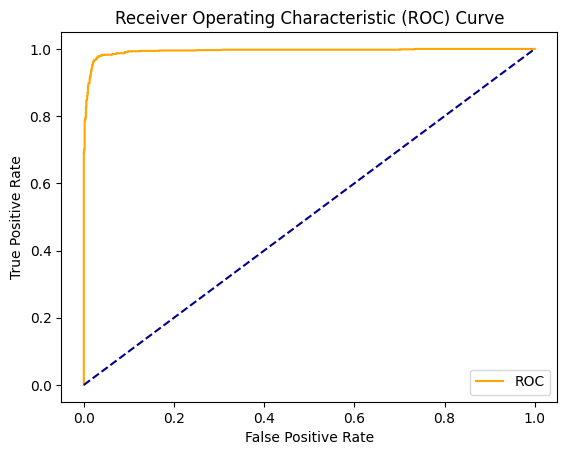

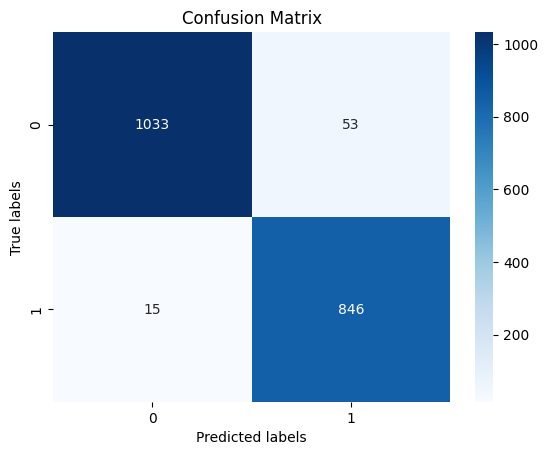

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 42}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

# Light GBM

[LightGBM] [Info] Number of positive: 3443, number of negative: 4343
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001505 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3199
[LightGBM] [Info] Number of data points in the train set: 7786, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.442204 -> initscore=-0.232222
[LightGBM] [Info] Start training from score -0.232222
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

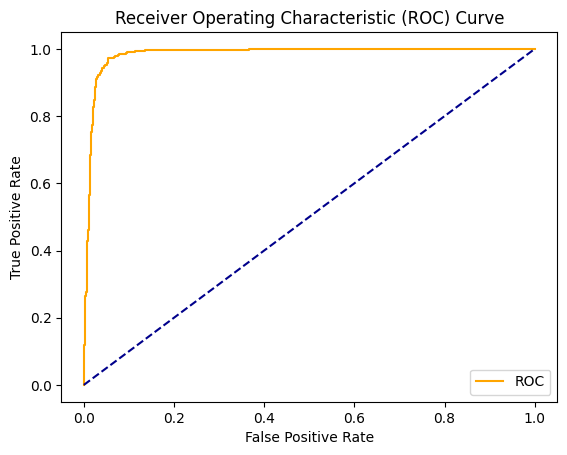

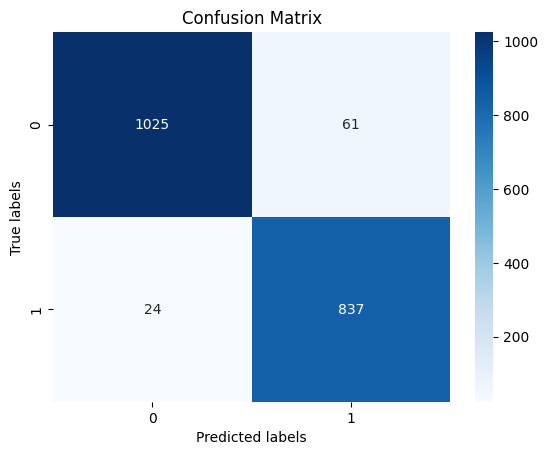

In [ ]:
# Light GBM
import lightgbm as lgb
params_lgb ={'colsample_bytree': 0.95,
         'max_depth': 16,
         'min_split_gain': 0.1,
         'n_estimators': 200,
         'num_leaves': 50,
         'reg_alpha': 1.2,
         'reg_lambda': 1.2,
         'subsample': 0.95,
         'subsample_freq': 20}

model_lgb = lgb.LGBMClassifier(**params_lgb)
model_lgb, accuracy_lgb, roc_auc_lgb, coh_kap_lgb, tt_lgb = run_model(model_lgb, X_train, y_train, X_test, y_test)

# Catboost Model

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 3.3 MB/s eta 0:00:00
Accuracy = 0.9661016949152542
ROC Area under Curve = 0.968530425241111
Cohen's Kappa = 0.931680287863418
Time taken = 302.15786576271057
              precision    recall  f1-score   support

         0.0    0.99133   0.94751   0.96893      1086
         1.0    0.93729   0.98955   0.96271       861

    accuracy                        0.96610      1947
   macro avg    0.96431   0.96853   0.96582      1947
weighted avg    0.96743   0.96610   0.96618      1947



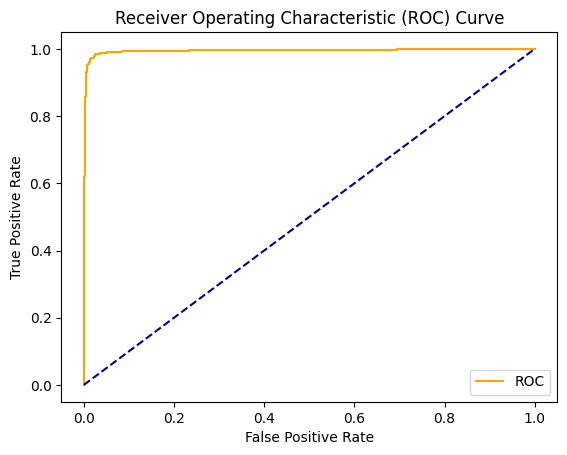

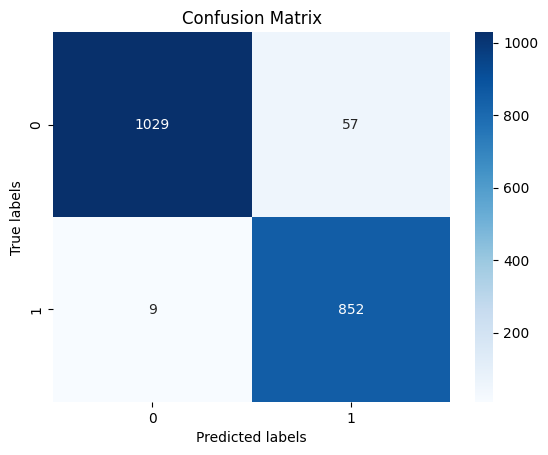

In [ ]:
# Catboost
!pip install catboost
import catboost as cb
params_cb ={'iterations': 50,
            'max_depth': 16}

model_cb = cb.CatBoostClassifier(**params_cb)
model_cb, accuracy_cb, roc_auc_cb, coh_kap_cb, tt_cb = run_model(model_cb, X_train, y_train, X_test, y_test, verbose=False)

# XGBoost Classifire model

Accuracy = 0.965588084232152
ROC Area under Curve = 0.9671075005935537
Cohen's Kappa = 0.9305204693219822
Time taken = 3.5599241256713867
              precision    recall  f1-score   support

         0.0    0.98386   0.95396   0.96868      1086
         1.0    0.94407   0.98026   0.96182       861

    accuracy                        0.96559      1947
   macro avg    0.96396   0.96711   0.96525      1947
weighted avg    0.96626   0.96559   0.96565      1947



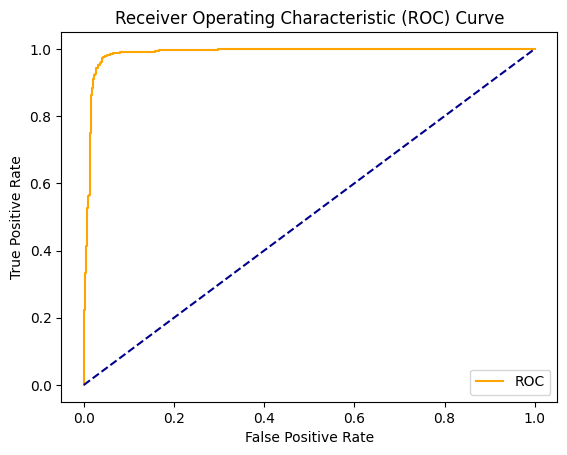

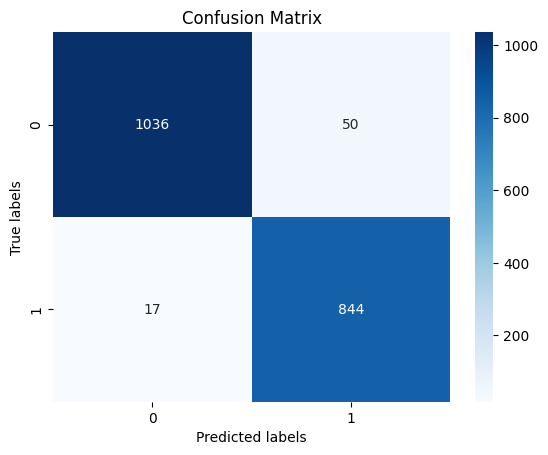

In [ ]:
# XGBoost
import xgboost as xgb
params_xgb ={'n_estimators': 500,
            'max_depth': 16}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, coh_kap_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)

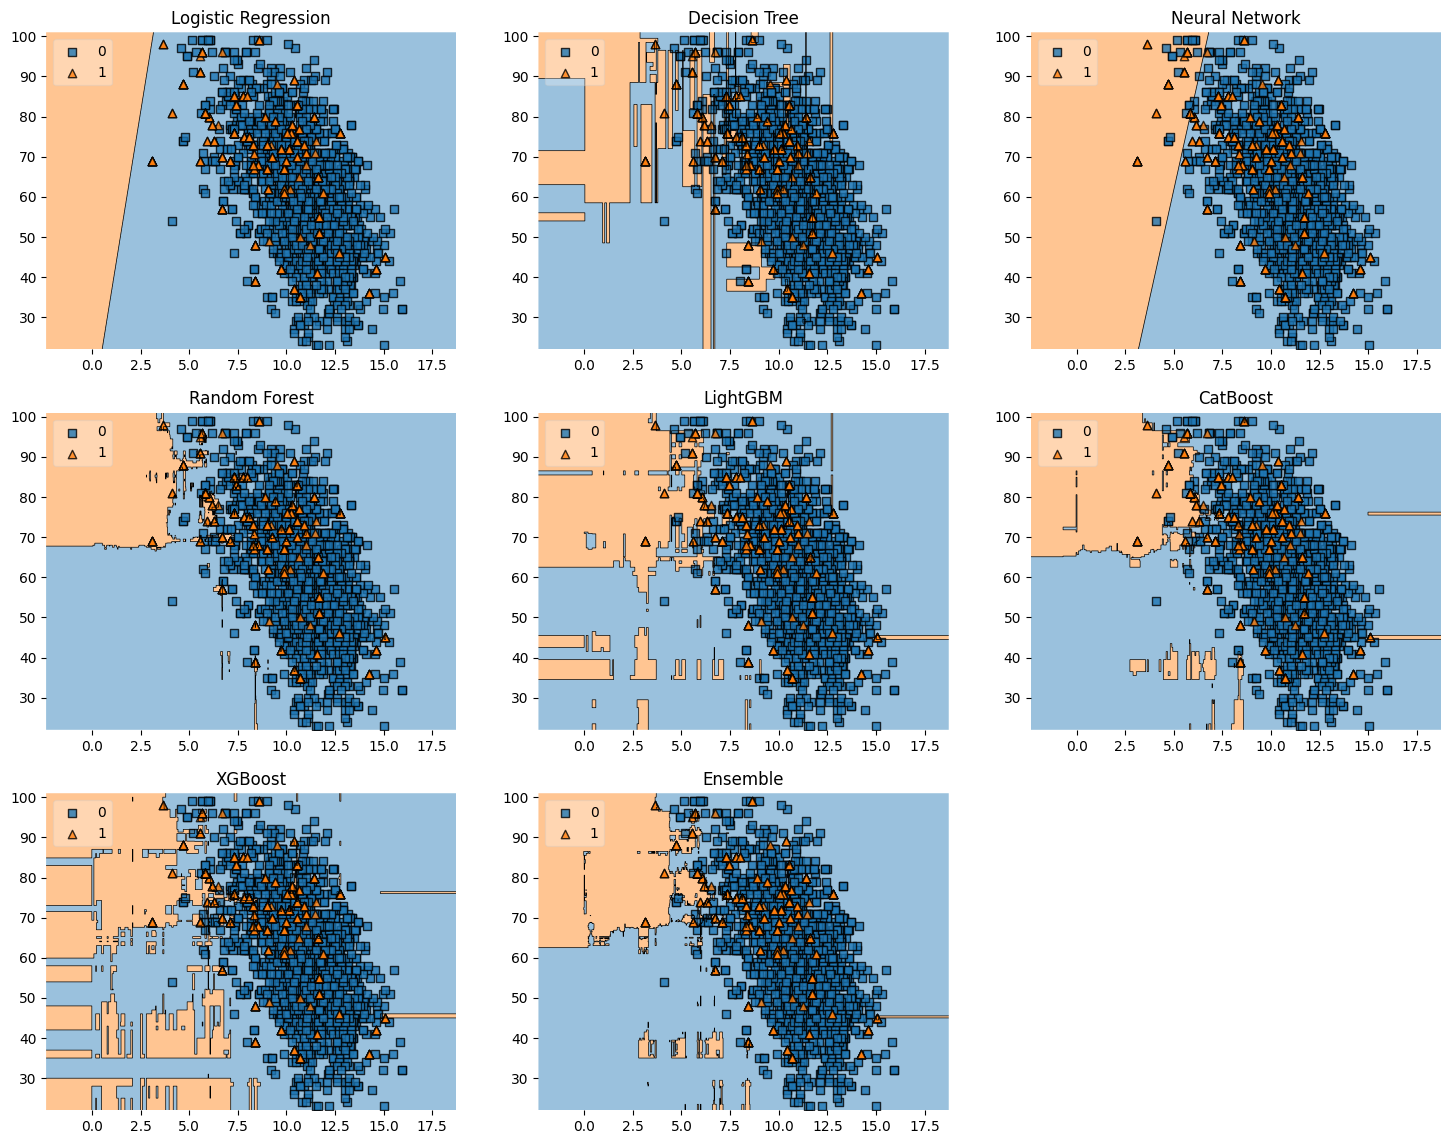

In [ ]:
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import catboost as cb
import xgboost as xgb
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions

value = 1.80
width = 0.90

clf1 = LogisticRegression(random_state=42)
clf2 = DecisionTreeClassifier(random_state=42)
clf3 = MLPClassifier(random_state=42, verbose = 0)
clf4 = RandomForestClassifier(random_state=42)
clf5 = lgb.LGBMClassifier(random_state=42, verbose = 0)
clf6 = cb.CatBoostClassifier(random_state=42, verbose = 0)
clf7 = xgb.XGBClassifier(random_state=42)
eclf = EnsembleVoteClassifier(clfs=[clf4, clf5, clf6, clf7], weights=[1, 1, 1, 1], voting='soft')

X_list = MiceImputed[["Sunshine", "Humidity9am", "Cloud3pm"]] #took only really important features
X = np.asarray(X_list, dtype=np.float32)
y_list = MiceImputed["RainTomorrow"]
y = np.asarray(y_list, dtype=np.int32)

# Plotting Decision Regions
gs = gridspec.GridSpec(3,3)
fig = plt.figure(figsize=(18, 14))

labels = ['Logistic Regression',
          'Decision Tree',
          'Neural Network',
          'Random Forest',
          'LightGBM',
          'CatBoost',
          'XGBoost',
          'Ensemble']

for clf, lab, grd in zip([clf1, clf2, clf3, clf4, clf5, clf6, clf7, eclf],
                         labels,
                         itertools.product([0, 1, 2],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf,
                                filler_feature_values={2: value},
                                filler_feature_ranges={2: width},
                                legend=2)
    plt.title(lab)

plt.show()

# Checking Models Accuracy

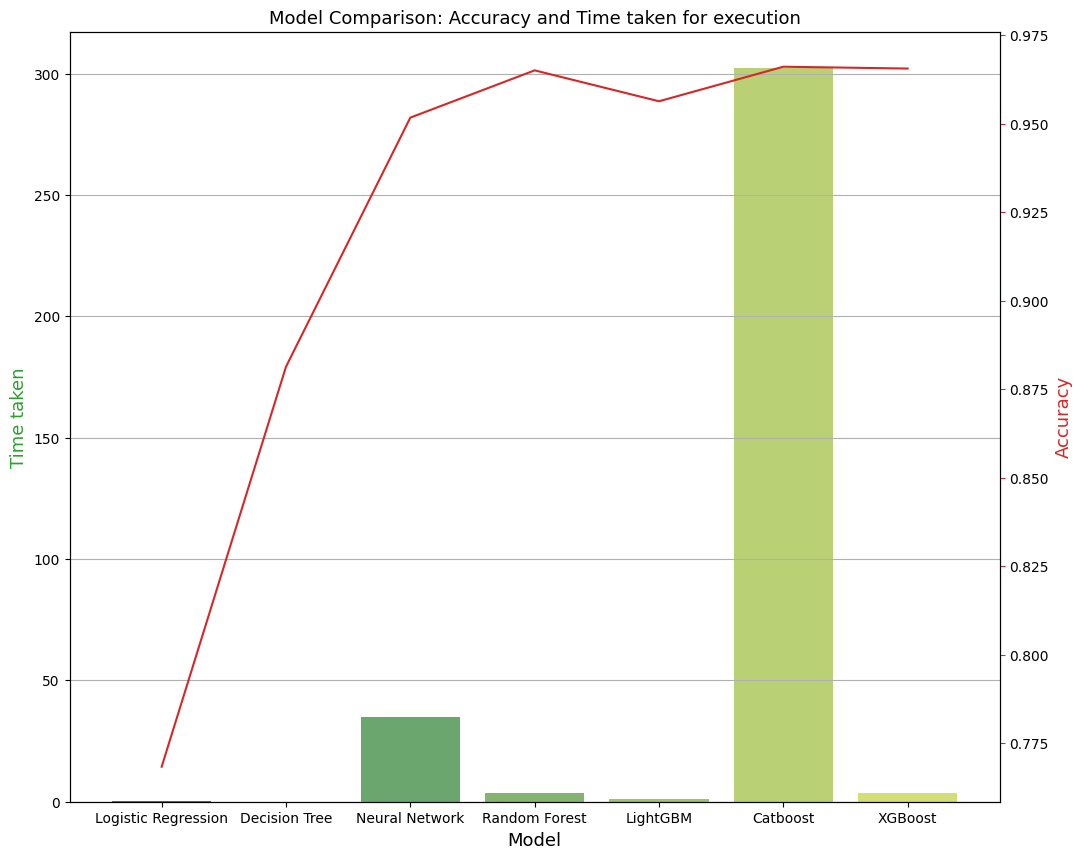

In [ ]:
accuracy_scores = [accuracy_lr, accuracy_dt, accuracy_nn, accuracy_rf, accuracy_lgb, accuracy_cb, accuracy_xgb]
roc_auc_scores = [roc_auc_lr, roc_auc_dt, roc_auc_nn, roc_auc_rf, roc_auc_lgb, roc_auc_cb, roc_auc_xgb]
coh_kap_scores = [coh_kap_lr, coh_kap_dt, coh_kap_nn, coh_kap_rf, coh_kap_lgb, coh_kap_cb, coh_kap_xgb]
tt = [tt_lr, tt_dt, tt_nn, tt_rf, tt_lgb, tt_cb, tt_xgb]

model_data = {'Model': ['Logistic Regression','Decision Tree','Neural Network','Random Forest','LightGBM','Catboost','XGBoost'],
              'Accuracy': accuracy_scores,
              'ROC_AUC': roc_auc_scores,
              'Cohen_Kappa': coh_kap_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(12,10))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=13)
color = 'tab:green'
ax1.grid()
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='Accuracy', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

# Model Comparison : Area under ROC and Cohens Kappa

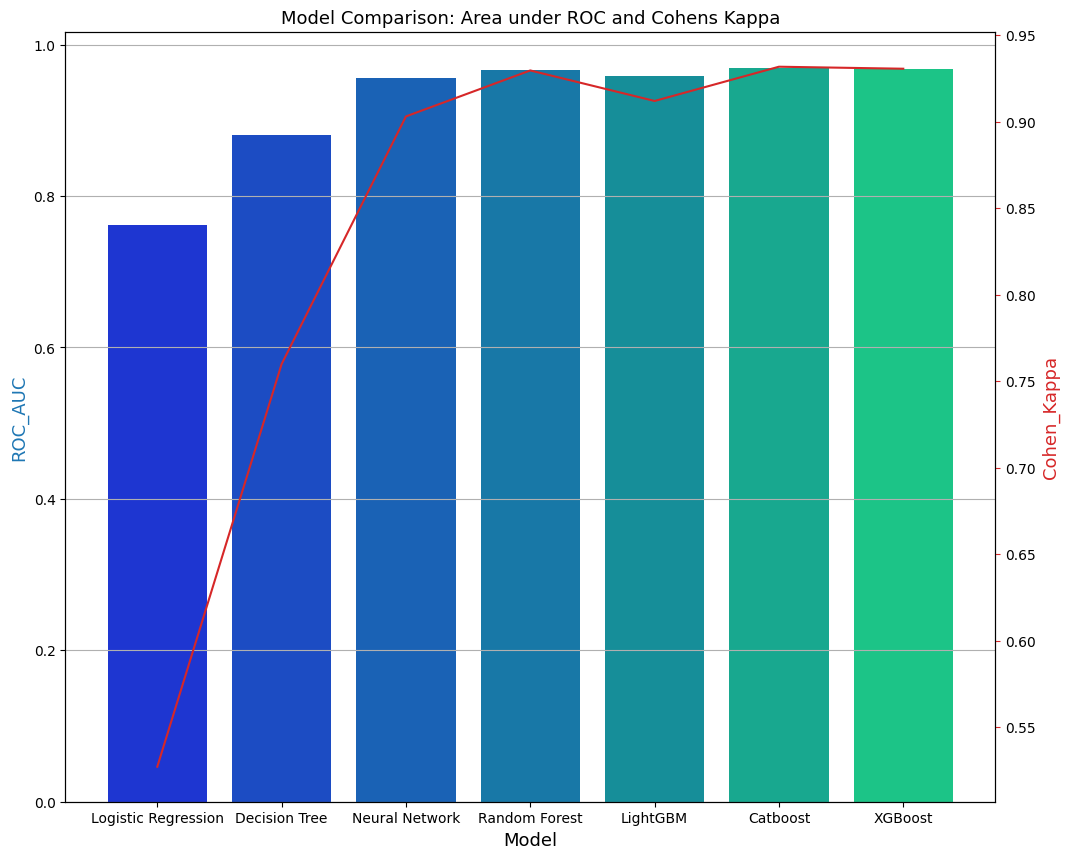

In [ ]:
fig, ax3 = plt.subplots(figsize=(12,10))
ax3.set_title('Model Comparison: Area under ROC and Cohens Kappa', fontsize=13)
color = 'tab:blue'
ax3.grid()
ax3.set_xlabel('Model', fontsize=13)
ax3.set_ylabel('ROC_AUC', fontsize=13, color=color)
ax4 = sns.barplot(x='Model', y='ROC_AUC', data = data, palette='winter')
ax3.tick_params(axis='y')
ax4 = ax3.twinx()
color = 'tab:red'
ax4.set_ylabel('Cohen_Kappa', fontsize=13, color=color)
ax4 = sns.lineplot(x='Model', y='Cohen_Kappa', data = data, sort=False, color=color)
ax4.tick_params(axis='y', color=color)
plt.show()